# Social Media Analysis (Facebook)

This analysis is performed on the Social media post level data of the non-profit

In [27]:
import numpy as np
import pandas as pd
import os
from emoji import replace_emoji
import re
import pattern
from pattern.en import lemma
from keybert import KeyBERT
import matplotlib.pyplot as plt
import json
from collections import Counter
from wordcloud import WordCloud

## Data Preparation

In [28]:
# Get the path where file is stored
path = os.getcwd()
# Joining path and filename
file_path = os.path.join(path,"data/Habitat_Post_level_Merged.xlsx")
# Read the file in dataframe
df_excel = pd.read_excel(io=file_path,sheet_name="Key metrics")
df_total_likes = pd.read_excel(io=file_path,sheet_name='Total_Likes')
df_excel.drop(index=0,inplace=True)
df_excel.shape

(412, 34)

In [29]:
df_total_likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Description         1 non-null      object        
 1   Post ID             412 non-null    object        
 2   Permalink           412 non-null    object        
 3   Post Message        404 non-null    object        
 4   Type                402 non-null    object        
 5   Countries           0 non-null      float64       
 6   Languages           0 non-null      float64       
 7   Posted              412 non-null    datetime64[ns]
 8   Audience Targeting  412 non-null    object        
 9   like                391 non-null    float64       
 10  share               50 non-null     float64       
 11  comment             49 non-null     float64       
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 38.8+ KB


In [30]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 1 to 412
Data columns (total 34 columns):
 #   Column                                                               Non-Null Count  Dtype         
---  ------                                                               --------------  -----         
 0   Post ID                                                              412 non-null    object        
 1   Permalink                                                            412 non-null    object        
 2   Post Message                                                         404 non-null    object        
 3   Type                                                                 412 non-null    object        
 4   Countries                                                            0 non-null      float64       
 5   Languages                                                            0 non-null      float64       
 6   Posted                                            

In [31]:
# Setting Post ID as the index of the dataframe
df_excel.set_index(keys="Post ID",inplace=True)
# Center aligning the table column heading
df_excel.head(2).style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

,Permalink,Post Message,Type,Countries,Languages,Posted,Audience Targeting,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Post Total Impressions,Lifetime Post Organic Impressions,Lifetime Post Paid Impressions,Lifetime Engaged Users,Lifetime Matched Audience Targeting Consumers on Post,Lifetime Matched Audience Targeting Consumptions on Post,Lifetime Negative Feedback from Users,Lifetime Negative Feedback,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime Post Paid Impressions by people who have liked your Page,Lifetime Paid reach of a post by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Lifetime Organic views to 95%,Lifetime Organic views to 95%.1,Lifetime Paid views to 95%,Lifetime Paid views to 95%.1,Lifetime Organic Video Views,Lifetime Organic Video Views.1,Lifetime Paid Video Views,Lifetime Paid Video Views.1,Lifetime Average time video viewed,Lifetime Video length
Post ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
386724564681370_5193417827345329,https://www.facebook.com/habitatmatthews/posts/5193417827345329,"Join our team as a full-time ReStore Truck Driver! This person will serve as an associate of the ReStore and is responsible for donation processing, customer service, retail floor stocking, and retrieval of external donations via the ReStore Truck (AKA you must have the ability to lift more than 50 lbs without assistance and safely lift/move furniture throughout the day). Benefits include health insurance, dental, vision, short-term & long-term disability, life insurance, flex spending, PTO for holidays, and 2 weeks' vacation. Plus getting to work as part of a great team, (mostly), 4-day work week, exercise throughout the day (no gym membership needed!), and being an integral part of the Habitat mission! 🚛 ➡️ 🏡 Visit greatermatthewshabitat.org/careers for more info",Video,nan,nan,2022-03-09 17:00:00,,36,36,0,38,38,0,2,0,0,0,0,33,31,0,0,2,7,7,0,0,11,12,0,0,5028,5000
386724564681370_5193403134013465,https://www.facebook.com/habitatmatthews/posts/5193403134013465,"Research has shown that when single women embark on the conventional path to homeownership, they often find themselves face to face with barriers that men are less likely to encounter. At Greater Matthews Habitat for Humanity, we knock down these barriers and empower women to build a stable future. #InternationalWomensDay2022 https://www.greatermatthewshabitat.org/post/women-builds-change-lives",Link,nan,nan,2022-03-08 17:00:01,,44,44,0,45,45,0,3,0,0,0,0,39,38,0,0,3,0,0,0,0,0,0,0,0,0,0


In [32]:
# Taking the important columns out of the whole dataset
columns = ['Post Message','Type','Posted','Lifetime Post Total Reach','Lifetime Post organic reach',
           'Lifetime Post Paid Reach','Lifetime Engaged Users',
           'Lifetime Negative Feedback from Users','Lifetime Organic views to 95%','Lifetime Paid views to 95%',
            'Lifetime Organic Video Views','Lifetime Paid Video Views']
# copying the whole dataframe, instead of assigning so that changes do not reflect in main dataframe
df_new = df_excel.copy()
# get the list of columns to drop
col_to_remove = list(set(df_excel.columns).difference(columns))
# drop the columns not required and commit the changes in dataframe itself
df_new.drop(columns=col_to_remove,inplace=True)
df_new.head()

,Post Message,Type,Posted,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Engaged Users,Lifetime Negative Feedback from Users,Lifetime Organic views to 95%,Lifetime Paid views to 95%,Lifetime Organic Video Views,Lifetime Paid Video Views
Post ID,,,,,,,,,,,,
386724564681370_5193417827345329,Join our team as a full-time ReStore Truck Dri...,Video,2022-03-09 17:00:00,36,36,0,2,0,7,0,11,0
386724564681370_5193403134013465,Research has shown that when single women emba...,Link,2022-03-08 17:00:01,44,44,0,3,0,0,0,0,0
386724564681370_5191248920895553,"Today, on International Women's Day, we celebr...",Video,2022-03-08 04:39:04,77,77,0,5,0,3,0,19,0
386724564681370_4964595313560916,"Clouds come floating into my life, no longer t...",Photo,2022-03-07 06:55:24,136,136,0,3,0,0,0,0,0
386724564681370_5180400168647095,This beautiful spring weather brings us back t...,Link,2022-03-03 13:11:13,255,255,0,8,0,0,0,0,0


In [33]:
# Check If any missing value in post text column
df_new.loc[df_new['Post Message'].isnull()==True,['Post Message','Type']]

,Post Message,Type
Post ID,,
386724564681370_5042038175816629,NaN,Photo
386724564681370_4886720334681748,NaN,SharedVideo
386724564681370_4650712888282495,NaN,Link
386724564681370_451657956291460,NaN,Video
386724564681370_4611148785572239,NaN,Link
386724564681370_4384430274910759,NaN,Link
386724564681370_1467176306957045,NaN,Video
386724564681370_3934192513267873,NaN,Photo


In [34]:
# Change Missing value to empty string
df_new.loc[df_new['Post Message'].isnull()==True,'Post Message'] = ''
row_idx = ['386724564681370_5042038175816629','386724564681370_4886720334681748','386724564681370_1467176306957045',
        '386724564681370_3934192513267873']
df_new.loc[row_idx,'Post Message']

Post ID
386724564681370_5042038175816629    
386724564681370_4886720334681748    
386724564681370_1467176306957045    
386724564681370_3934192513267873    
Name: Post Message, dtype: object

In [35]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 386724564681370_5193417827345329 to 386724564681370_3856901330996992
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Post Message                           412 non-null    object        
 1   Type                                   412 non-null    object        
 2   Posted                                 412 non-null    datetime64[ns]
 3   Lifetime Post Total Reach              412 non-null    object        
 4   Lifetime Post organic reach            412 non-null    object        
 5   Lifetime Post Paid Reach               412 non-null    object        
 6   Lifetime Engaged Users                 412 non-null    object        
 7   Lifetime Negative Feedback from Users  412 non-null    object        
 8   Lifetime Organic views to 95%          412 non-null    object        
 9   Lifetime P

In [36]:
pd.DataFrame(df_new.loc['386724564681370_4931990680154713'])

,386724564681370_4931990680154713
Post Message,Donating a vehicle may be tax-deductible. 💵 Le...
Type,Photo
Posted,2022-01-23 09:15:03
Lifetime Post Total Reach,105
Lifetime Post organic reach,105
Lifetime Post Paid Reach,0
Lifetime Engaged Users,2
Lifetime Negative Feedback from Users,0
Lifetime Organic views to 95%,0
Lifetime Paid views to 95%,0


In [37]:
# Adding a year field in the dataframe, which will be used to generate word cloud on yearly basis
df_new['year'] = df_new['Posted'].dt.year
np.unique(df_new['year'])

array([2021, 2022], dtype=int64)

In [38]:
# Cleaning the posts sentences --> removing emojis, removing sentence which says Visit, Learn more, Read more, and removing URL's
def clean(post_text):
    if post_text != '':
        sentence = replace_emoji(post_text,'')
        sentence = re.sub(r'Visit.*?($|\.$|\.\s|!$|!\s)', '', sentence)
        sentence = re.sub(r'Learn more.*?($|\.$|\.\s|!$|!\s)', '', sentence)
        sentence = re.sub(r'Read more here.*?($|\.$|\.\s|!$|!\s)', '', sentence)
        sentence = re.sub(r'http\S+','',sentence) # remove URL
        sentence = re.sub(r'greatermatthewshabitat.org\S+', '', sentence)

        #lemmatize
        sentence = [lemma(word) for word in sentence.split()]
        sentence = ' '.join(sentence)
        return sentence
    else:
        return post_text
    
df_new['clean_txt'] = df_new['Post Message'].apply(clean)

In [39]:
# printing one of the post-id to verify if the post is clean or not
print(df_new.loc['386724564681370_5115766841777095','clean_txt'])

construction be an inherently dangerou activity - and because habitat home be build with the help of volunteer labor, safety be our number one priority. congratulation to our homeowner service manager, jeffrey elam, for become a habitat for humanity competent person. he be now train to identify exist or predictable hazard and have the authorization to take prompt corrective measure to eliminate them - and will be able to pass thi information along to our partner family a they prepare to work on site.


## Keyphrases Extraction

The intent of this analysis is to determine key phrases that leads to most engaging posts by their followers.

In [40]:
# Using KeyBERT algorithm to extract keyphrases from every facebook posts
kw_model = KeyBERT()
keyphrases = []
for idx,value in df_new.iterrows():
    # Retrieving key phrases for the posts which has post messages in it
    if value['Post Message'] != '' :        
        k = kw_model.extract_keywords(value['clean_txt'],keyphrase_ngram_range=(1,2),stop_words='english') 
        keyphrases += list(map(lambda a : a[0], k))
    # df_new.at[idx, 'keyphrases'] = json.dumps(k)
        df_new.loc[idx, 'keyphrases'] = json.dumps(k)
    else:
        df_new.loc[idx, 'keyphrases'] = ''

Downloading: 100%|██████████| 1.18k/1.18k [00:00<00:00, 1.17MB/s]
Downloading: 100%|██████████| 190/190 [00:00<?, ?B/s] 
Downloading: 100%|██████████| 10.6k/10.6k [00:00<00:00, 5.31MB/s]
Downloading: 100%|██████████| 116/116 [00:00<00:00, 88.2kB/s]
Downloading: 100%|██████████| 39.3k/39.3k [00:00<00:00, 19.6MB/s]
Downloading: 100%|██████████| 90.9M/90.9M [00:04<00:00, 19.3MB/s]
Downloading: 100%|██████████| 53.0/53.0 [00:00<00:00, 26.5kB/s]
Downloading: 100%|██████████| 112/112 [00:00<00:00, 56.0kB/s]
Downloading: 100%|██████████| 466k/466k [00:00<00:00, 3.87MB/s]
Downloading: 100%|██████████| 350/350 [00:00<00:00, 350kB/s]
Downloading: 100%|██████████| 13.2k/13.2k [00:00<00:00, 6.57MB/s]
Downloading: 100%|██████████| 232k/232k [00:00<00:00, 2.64MB/s]
Downloading: 100%|██████████| 349/349 [00:00<00:00, 349kB/s]


In [41]:
# Filter out the phrases --> habitat,matthew, and humanity because these won't serve the purpose of finding main keywords
def filter_val(phrase):
    if 'habitat' in phrase or 'matthew' in phrase or 'humanity' in phrase:
        return False
    return True 
# Putting all the phrases of the posts in a list
keyphrases = list(filter(filter_val, keyphrases))
keyphrases

['restore truck',
 'truck driver',
 'donation restore',
 'truck',
 'lift 50',
 'single women',
 'empower women',
 'future internationalwomensday2022',
 'women day',
 'international women',
 'women world',
 'strong women',
 'celebrate strong',
 'sunset sky',
 'sunset',
 'color sunset',
 'cloud come',
 'sky rabindranath',
 'butterfly garden',
 'beautiful spring',
 'mission join',
 'opportunity mission',
 'carol burnett',
 'dream',
 'dream ve',
 'let carol',
 'burnett',
 'time nonprofit',
 'employee volunteer',
 'nonprofit',
 'nonprofit communities',
 'encourage employee',
 'intergenerational poverty',
 'affordable house',
 'childhood poverty',
 'reduce intergenerational',
 'reduce childhood',
 'hiring',
 'hiring come',
 'nc home',
 'income repair',
 'nc',
 'resident town',
 'critical repair',
 'repair need',
 'hammer outside',
 'swing hammer',
 'volunteer opportunity',
 'volunteer',
 'affordable house',
 'elevation outreach',
 'outreach fair',
 'elevation church',
 'outreach include',
 '

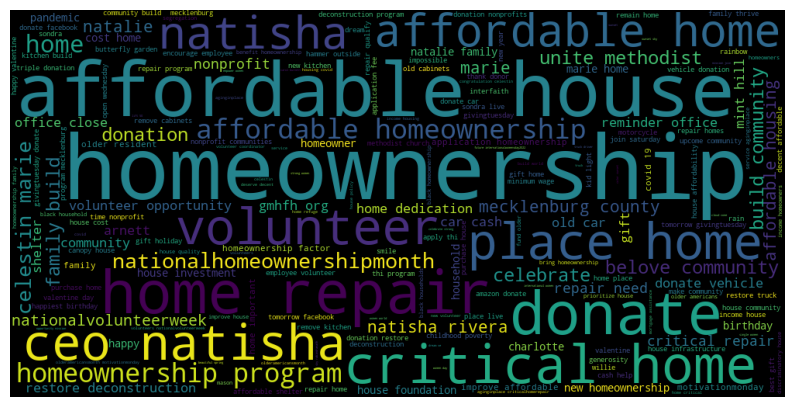

In [42]:
# Creating Word Cloud from all the key-phrases based on the frequency of their occurrence
word_could_dict=Counter(keyphrases)
# Generating Word Cloud object
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
# Word Cloud Visual
plt.figure(figsize=(10,14))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [43]:
df_new[df_new['year']==2021]['keyphrases']

Post ID
386724564681370_4966342340052880    [["matthew habitat", 0.5697], ["greater matthe...
386724564681370_4932901420063639    [["taxes donate", 0.5762], ["donate today", 0....
386724564681370_4958068280880286    [["natisha matthews", 0.6653], ["congratulatio...
386724564681370_4931955066824941    [["donate vehicle", 0.7768], ["easily donate",...
386724564681370_4932798810073900    [["make donation", 0.5971], ["tax relief", 0.5...
                                                          ...                        
386724564681370_3869663943054064    [["habitat effort", 0.5904], ["habitat", 0.552...
386724564681370_3869469403073518    [["place home", 0.5563], ["habitat help", 0.55...
386724564681370_3867349993285459    [["affordable place", 0.6416], ["decent afford...
386724564681370_3867287339958391    [["shelter", 0.6246], ["self reliance", 0.523]...
386724564681370_3856901330996992    [["time nonprofit", 0.5664], ["employee volunt...
Name: keyphrases, Length: 355, dtype: object

In [44]:
keyphrases_tmp = []
matches = ['habitat','matthew','humanity']
def get_phrases(a):
    if a != '':
        a = json.loads(a)        
        for itm in a:
            if not any(x in itm[0] for x in matches):                    
                keyphrases_tmp.append(itm[0])                                    
        # return keyphrases_tmp


Year : 2021


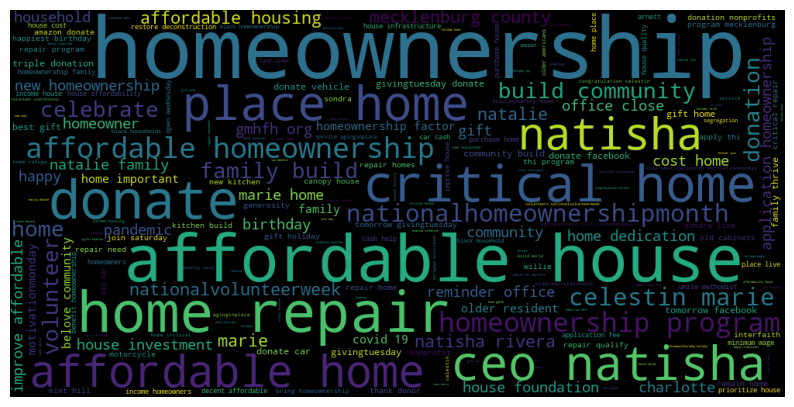

Year : 2022


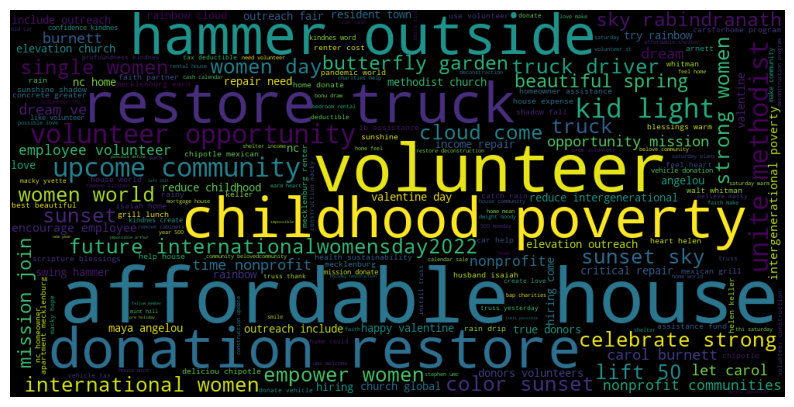

In [45]:
keyphrases_tmp1 = []
keyphrases_tmp2 = []
for year in np.unique(df_new['year']):
    keyphrases_tmp = []
    
    df_temp = df_new[df_new['year'] == year]
    df_temp['keyphrases'].apply(get_phrases)  
    print("Year : " + str(year))  
    # Creating Word Cloud from all the key-phrases based on the frequency of their occurrence
    word_could_dict=Counter(keyphrases_tmp)
    # Generating Word Cloud object
    wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
    # Word Cloud Visual
    plt.figure(figsize=(10,14))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [46]:
# keyphrases and their weights
df_new[['keyphrases']].head().style.set_properties(subset=['keyphrases'], **{'width': '300px'})

,keyphrases
Post ID,
386724564681370_5193417827345329,"[[""restore truck"", 0.6376], [""truck driver"", 0.443], [""donation restore"", 0.4401], [""truck"", 0.4356], [""lift 50"", 0.3985]]"
386724564681370_5193403134013465,"[[""single women"", 0.5133], [""empower women"", 0.4758], [""future internationalwomensday2022"", 0.4262], [""matthew habitat"", 0.4076], [""habitat humanity"", 0.3999]]"
386724564681370_5191248920895553,"[[""women day"", 0.6557], [""international women"", 0.605], [""women world"", 0.5633], [""strong women"", 0.5596], [""celebrate strong"", 0.5095]]"
386724564681370_4964595313560916,"[[""sunset sky"", 0.5577], [""sunset"", 0.5267], [""color sunset"", 0.5179], [""cloud come"", 0.5116], [""sky rabindranath"", 0.5051]]"
386724564681370_5180400168647095,"[[""habitat matthews"", 0.6018], [""butterfly garden"", 0.578], [""beautiful spring"", 0.5329], [""habitat"", 0.5249], [""founder habitat"", 0.5098]]"


## Posts Stats Analysis

The intent of this is to determine the attributes of the posts - Post Time, Day, Length, and Type, to achieve the best engagement.

In [47]:
# Interaction Ratio of the post entered their screen
df_new['interaction_ratio'] = (df_new['Lifetime Engaged Users'] / df_new['Lifetime Post Total Reach']) * 100

In [48]:
# Adding Columns -  Ratio of 95% organic videos, Ratio of more than 3 sec organic videos, Ratio of 95% paid Views, Ratio of more than 3 sec paid videos
df_new['Ratio_95%_OV'] = (df_new['Lifetime Organic views to 95%']/df_new['Lifetime Post organic reach']) * 100
df_new['Ratio_3sec_OV'] = (df_new['Lifetime Organic Video Views']/df_new['Lifetime Post organic reach']) * 100

for idx,val in df_new.iterrows():
    if val['Lifetime Post Paid Reach'] != 0:
        df_new.at[idx,'Ratio_95%_PV'] = (val['Lifetime Paid views to 95%']/val['Lifetime Post Paid Reach']) * 100
        df_new.at[idx,'Ratio_3sec_PV'] = (val['Lifetime Paid Video Views']/val['Lifetime Post Paid Reach']) * 100
    else:
        df_new.at[idx,'Ratio_95%_PV'] = 0
        df_new.at[idx,'Ratio_3sec_PV'] = 0

df_new.head(n=15)

,Post Message,Type,Posted,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Engaged Users,Lifetime Negative Feedback from Users,Lifetime Organic views to 95%,Lifetime Paid views to 95%,Lifetime Organic Video Views,Lifetime Paid Video Views,year,clean_txt,keyphrases,interaction_ratio,Ratio_95%_OV,Ratio_3sec_OV,Ratio_95%_PV,Ratio_3sec_PV
Post ID,,,,,,,,,,,,,,,,,,,,
386724564681370_5193417827345329,Join our team as a full-time ReStore Truck Dri...,Video,2022-03-09 17:00:00,36,36,0,2,0,7,0,11,0,2022,join our team a a full-time restore truck driv...,"[[""restore truck"", 0.6376], [""truck driver"", 0...",5.555556,19.444444,30.555556,0.000000,0.000000
386724564681370_5193403134013465,Research has shown that when single women emba...,Link,2022-03-08 17:00:01,44,44,0,3,0,0,0,0,0,2022,research have show that when single women emba...,"[[""single women"", 0.5133], [""empower women"", 0...",6.818182,0.0,0.0,0.000000,0.000000
386724564681370_5191248920895553,"Today, on International Women's Day, we celebr...",Video,2022-03-08 04:39:04,77,77,0,5,0,3,0,19,0,2022,"today, on international women' day, we celebra...","[[""women day"", 0.6557], [""international women""...",6.493506,3.896104,24.675325,0.000000,0.000000
386724564681370_4964595313560916,"Clouds come floating into my life, no longer t...",Photo,2022-03-07 06:55:24,136,136,0,3,0,0,0,0,0,2022,"cloud come float into my life, no longer to ca...","[[""sunset sky"", 0.5577], [""sunset"", 0.5267], [...",2.205882,0.0,0.0,0.000000,0.000000
386724564681370_5180400168647095,This beautiful spring weather brings us back t...,Link,2022-03-03 13:11:13,255,255,0,8,0,0,0,0,0,2022,thi beautiful spring weather bring u back to t...,"[[""habitat matthews"", 0.6018], [""butterfly gar...",3.137255,0.0,0.0,0.000000,0.000000
386724564681370_5176805572339888,Looking for a great place to work and an oppor...,Link,2022-03-02 07:05:11,106,106,0,3,0,0,0,0,0,2022,look for a great place to work and an opportun...,"[[""matthew habitat"", 0.5803], [""habitat humani...",2.830189,0.0,0.0,0.000000,0.000000
386724564681370_5174106639276448,"Every Habitat for Humanity home is special, bu...",Link,2022-03-01 07:55:22,110,110,0,4,0,0,0,0,0,2022,"every habitat for humanity home be special, bu...","[[""habitat humanity"", 0.6111], [""habitat home""...",3.636364,0.0,0.0,0.000000,0.000000
386724564681370_4964590473561400,"When you have a dream, you've got to grab it a...",Photo,2022-02-28 06:52:44,114,114,0,2,1,0,0,0,0,2022,"when you have a dream, you've get to grab it a...","[[""carol burnett"", 0.4743], [""dream"", 0.4311],...",1.754386,0.0,0.0,0.000000,0.000000
386724564681370_5162944490392663,Many companies not only encourage their employ...,Photo,2022-02-27 09:04:00,75,75,0,2,0,0,0,0,0,2022,many company not only encourage their employee...,"[[""time nonprofit"", 0.5664], [""employee volunt...",2.666667,0.0,0.0,0.000000,0.000000


Text(0, 0.5, 'Average Interaction')

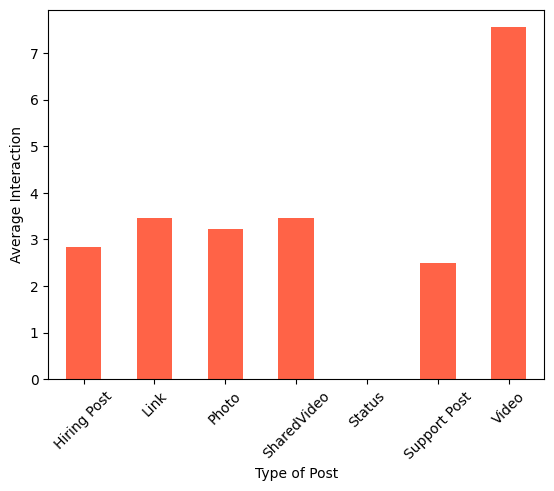

In [49]:
# plotting Interaction ratio based on Type of Post
df_new.groupby("Type")['interaction_ratio'].mean()\
    .plot(kind='bar',color='tomato')
plt.xticks(rotation = 45)
plt.xlabel('Type of Post')
plt.ylabel('Average Interaction')

Text(0, 0.5, 'average interaction ratio')

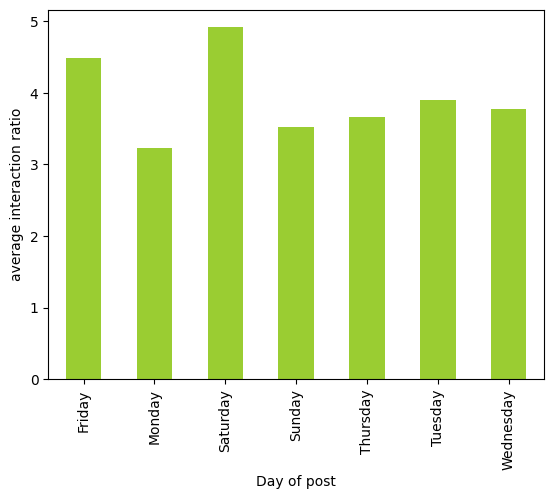

In [50]:
# Interaction on weekdays
df_new['weekday'] = df_new['Posted'].dt.day_name()
df_new.groupby("weekday")['interaction_ratio'].mean()\
    .plot(kind='bar',color='yellowgreen')
plt.xlabel('Day of post')
plt.ylabel('average interaction ratio')

Text(0, 0.5, 'Average Interaction Ratio')

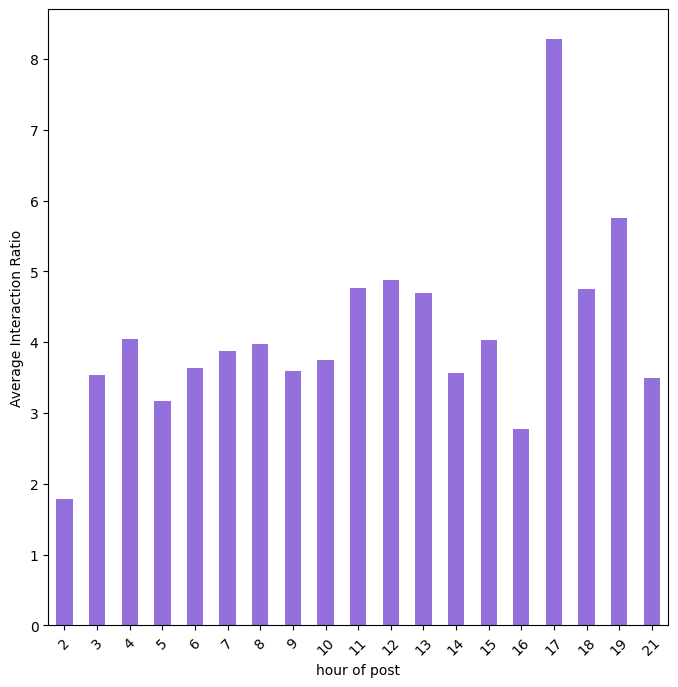

In [51]:
# ratio of interaction by time(hour)
df_new['hour'] = df_new['Posted'].dt.hour
df_new.groupby("hour")['interaction_ratio'].mean()\
    .plot(kind='bar',color='mediumpurple',figsize=(8,8))
plt.xticks(rotation=45)
# plt.xticks(np.arange(0,25,1),rotation = 45)
plt.xlabel('hour of post')
plt.ylabel('Average Interaction Ratio')

In [52]:
# Top 10 interactive posts
df_top10 = df_new[['Type','Posted','interaction_ratio','keyphrases']].sort_values(by='interaction_ratio',axis=0,ascending=False)
df_top10.head(10).style.set_properties(subset=['keyphrases'], **{'width': '300px'})

,Type,Posted,interaction_ratio,keyphrases
Post ID,,,,
386724564681370_4647181291968988,Photo,2021-09-27 09:18:22,18.807060,"[[""council nancy"", 0.5207], [""nancy glenn"", 0.5089], [""ceo natisha"", 0.5011], [""glenn award"", 0.4935], [""matthew community"", 0.4689]]"
386724564681370_4200917089928746,Video,2021-04-30 13:23:06,15.625000,"[[""ready burgers"", 0.4687], [""grill"", 0.447], [""brat volunteer"", 0.4403], [""build committee"", 0.4363], [""burgers beers"", 0.4336]]"
386724564681370_4133391826681273,Video,2021-04-11 06:32:56,15.467626,"[[""habitat home"", 0.7028], [""habitat humanity"", 0.6669], [""support habitat"", 0.6109], [""habitat"", 0.5687], [""habitat tremendou"", 0.5583]]"
386724564681370_451657956291460,Video,2021-09-25 07:02:15,15.303030,
386724564681370_3869711133049345,Video,2021-01-09 11:10:18,14.930556,"[[""help family"", 0.5755], [""family"", 0.5203], [""homeownership improve"", 0.506], [""generosity"", 0.4988], [""mean family"", 0.4771]]"
386724564681370_4545897192097399,Link,2021-08-28 08:42:28,14.076246,"[[""willie"", 0.4999], [""willie story"", 0.4995], [""read willie"", 0.4941], [""willie said"", 0.4822], [""willie able"", 0.4552]]"
386724564681370_4988371727849941,Video,2022-01-07 11:58:45,13.284133,"[[""affordable shelter"", 0.6227], [""affordable house"", 0.5908], [""childhood poverty"", 0.5277], [""shelter income"", 0.4879], [""shelter"", 0.4759]]"
386724564681370_4027400280613762,Video,2021-03-02 10:16:22,12.500000,"[[""coordinator liz"", 0.5644], [""volunteer coordinator"", 0.5033], [""liz left"", 0.4853], [""new volunteer"", 0.474], [""service coordinator"", 0.4404]]"
386724564681370_5162938497059929,Video,2022-02-26 17:00:06,12.500000,"[[""intergenerational poverty"", 0.6523], [""affordable house"", 0.6495], [""childhood poverty"", 0.5958], [""reduce intergenerational"", 0.5655], [""reduce childhood"", 0.5328]]"


In [53]:
# identifying the length of each post
df_post_len = df_new.loc[:,:]
df_post_len['post_length'] = df_post_len['Post Message'].apply(lambda x: len(x.split()))
df_post_len.head()

,Post Message,Type,Posted,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Engaged Users,Lifetime Negative Feedback from Users,Lifetime Organic views to 95%,Lifetime Paid views to 95%,...,clean_txt,keyphrases,interaction_ratio,Ratio_95%_OV,Ratio_3sec_OV,Ratio_95%_PV,Ratio_3sec_PV,weekday,hour,post_length
Post ID,,,,,,,,,,,,,,,,,,,,,
386724564681370_5193417827345329,Join our team as a full-time ReStore Truck Dri...,Video,2022-03-09 17:00:00,36,36,0,2,0,7,0,...,join our team a a full-time restore truck driv...,"[[""restore truck"", 0.6376], [""truck driver"", 0...",5.555556,19.444444,30.555556,0.0,0.0,Wednesday,17,120
386724564681370_5193403134013465,Research has shown that when single women emba...,Link,2022-03-08 17:00:01,44,44,0,3,0,0,0,...,research have show that when single women emba...,"[[""single women"", 0.5133], [""empower women"", 0...",6.818182,0.0,0.0,0.0,0.0,Tuesday,17,51
386724564681370_5191248920895553,"Today, on International Women's Day, we celebr...",Video,2022-03-08 04:39:04,77,77,0,5,0,3,0,...,"today, on international women' day, we celebra...","[[""women day"", 0.6557], [""international women""...",6.493506,3.896104,24.675325,0.0,0.0,Tuesday,4,47
386724564681370_4964595313560916,"Clouds come floating into my life, no longer t...",Photo,2022-03-07 06:55:24,136,136,0,3,0,0,0,...,"cloud come float into my life, no longer to ca...","[[""sunset sky"", 0.5577], [""sunset"", 0.5267], [...",2.205882,0.0,0.0,0.0,0.0,Monday,6,25
386724564681370_5180400168647095,This beautiful spring weather brings us back t...,Link,2022-03-03 13:11:13,255,255,0,8,0,0,0,...,thi beautiful spring weather bring u back to t...,"[[""habitat matthews"", 0.6018], [""butterfly gar...",3.137255,0.0,0.0,0.0,0.0,Thursday,13,37


In [54]:
# the maximum length of the post
df_post_len['post_length'].max()

192

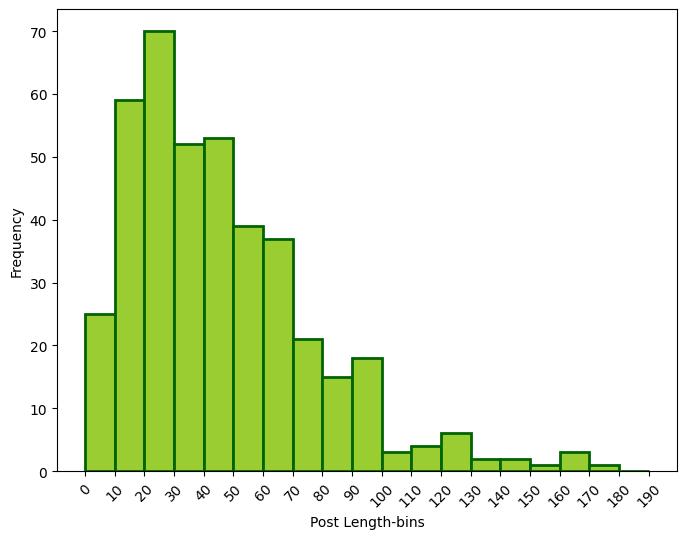

In [55]:
# Plotting the frequency of posts length
plt.figure(figsize=(8,6))
plt.hist(df_post_len['post_length'], bins=np.arange(min(df_post_len['post_length']), 200, 10),color='yellowgreen',edgecolor='darkgreen',linewidth=2)
plt.xticks(range(0,200,10),rotation=45)
plt.xlabel('Post Length-bins')
plt.ylabel('Frequency')
plt.show()

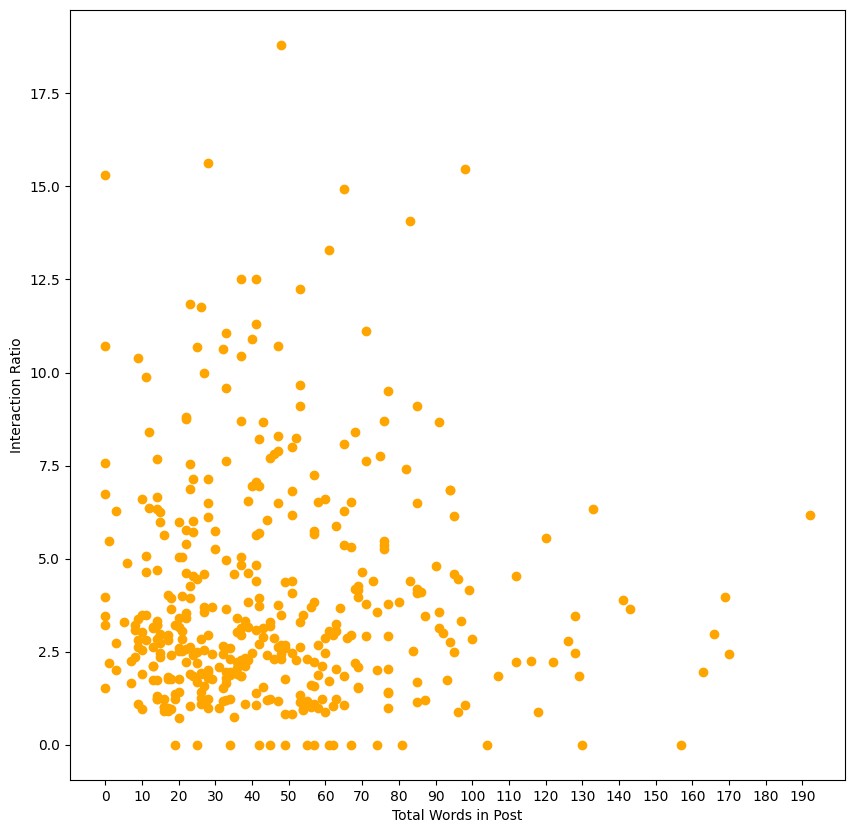

In [56]:
# Interaction ratio based on the length of the post
plt.figure(figsize=(10,10))
plt.scatter(x=df_post_len['post_length'],y=df_post_len['interaction_ratio'],c='orange')
plt.xticks(range(0,200,10))
plt.xlabel('Total Words in Post')
plt.ylabel('Interaction Ratio')
plt.show()

In [57]:
# Keeping Organic Reach of post(Page's post enter their screen through unpaid distribution)
df_organic_reach = df_post_len.loc[:,:]
df_organic_reach.drop(df_organic_reach[df_organic_reach['Lifetime Post Paid Reach']!=0].index,inplace=True)
df_organic_reach.shape

(384, 23)

In [58]:
# Organic reach Engagement
df_organic_reach.tail()

,Post Message,Type,Posted,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Engaged Users,Lifetime Negative Feedback from Users,Lifetime Organic views to 95%,Lifetime Paid views to 95%,...,clean_txt,keyphrases,interaction_ratio,Ratio_95%_OV,Ratio_3sec_OV,Ratio_95%_PV,Ratio_3sec_PV,weekday,hour,post_length
Post ID,,,,,,,,,,,,,,,,,,,,,
386724564681370_3869408756412916,We build because we want to make this world a ...,Video,2021-01-08 09:19:25,56,56,0,3,0,2,0,...,we build because we want to make thi world a f...,"[[""dream homeownership"", 0.5551], [""build want...",5.357143,3.571429,17.857143,0.0,0.0,Friday,9,76
386724564681370_3869663943054064,A sense of connectedness and a willingness to ...,Video,2021-01-07 11:43:31,55,55,0,5,0,7,0,...,a sense of connectednes and a willingnes to ac...,"[[""habitat effort"", 0.5904], [""habitat"", 0.552...",9.090909,12.727273,27.272727,0.0,0.0,Thursday,11,85
386724564681370_3869469403073518,COVID-19 has forced everyone to deeply conside...,Video,2021-01-06 05:52:27,65,65,0,4,0,3,0,...,covid-19 have force everyone to deeply conside...,"[[""place home"", 0.5563], [""habitat help"", 0.55...",6.153846,4.615385,29.230769,0.0,0.0,Wednesday,5,95
386724564681370_3867349993285459,Everyone deserves a decent and affordable plac...,Photo,2021-01-05 08:47:13,91,91,0,1,0,0,0,...,everyone deserve a decent and affordable place...,"[[""affordable place"", 0.6416], [""decent afford...",1.098901,0.0,0.0,0.0,0.0,Tuesday,8,9
386724564681370_3856901330996992,Many companies not only encourage their employ...,Photo,2021-01-02 07:07:33,113,113,0,2,0,0,0,...,many company not only encourage their employee...,"[[""time nonprofit"", 0.5664], [""employee volunt...",1.769912,0.0,0.0,0.0,0.0,Saturday,7,49


<AxesSubplot: xlabel='Type'>

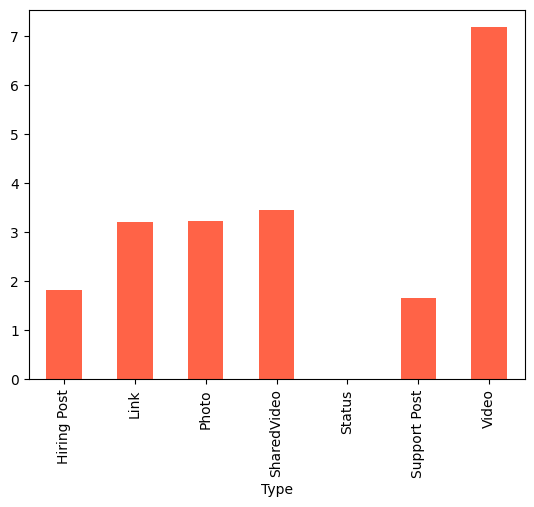

In [59]:
# Plotting average interaction based on Post Type for Organic reach
df_organic_reach.groupby("Type")['interaction_ratio'].mean()\
    .plot(kind='bar',color='tomato')

<AxesSubplot: xlabel='weekday'>

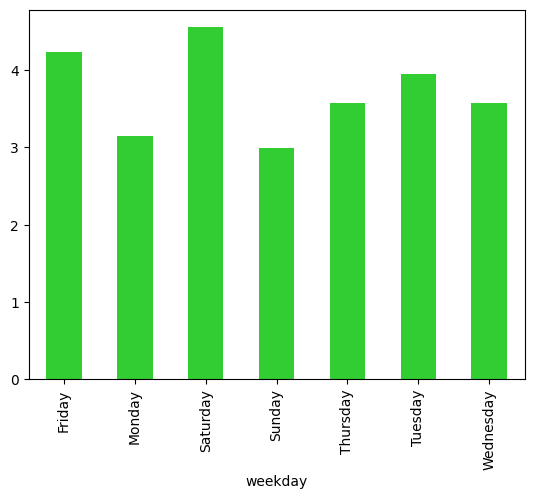

In [60]:
# Plotting average interaction based on weekday for Organic reach
df_organic_reach.groupby("weekday")['interaction_ratio'].mean()\
    .plot(kind='bar',color='limegreen')

<AxesSubplot: xlabel='hour'>

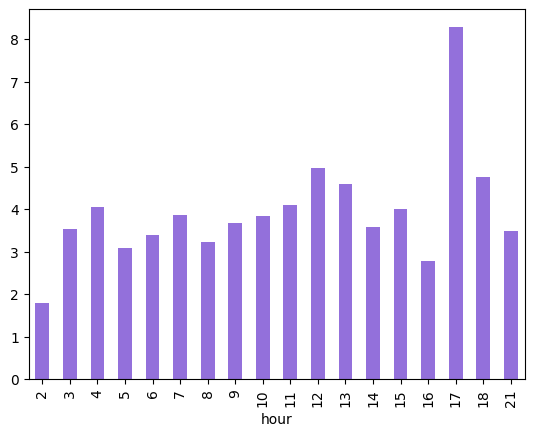

In [61]:
# Plotting average interaction based on hour for Organic reach
df_organic_reach.groupby("hour")['interaction_ratio'].mean()\
    .plot(kind='bar',color='mediumpurple')

In [62]:
# Engagement Ratio(Unique people who engage/people who follow on facebook) --> 2199 people follow them on FB
df_new['engage_ratio'] = (df_new['Lifetime Engaged Users']/2199)*100

Text(0, 0.5, 'Engagement %')

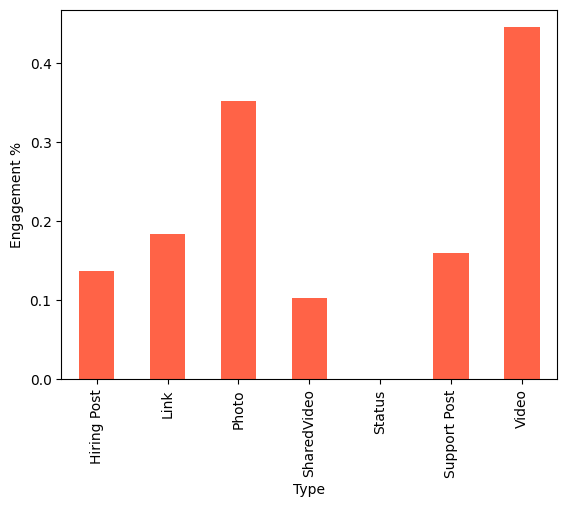

In [63]:
# Engagement Ratio by post type by people who follow on FB
df_eng_ratio = df_new[df_new['Lifetime Post Paid Reach']==0]
df_eng_ratio.groupby('Type')['engage_ratio'].mean()\
    .plot(kind='bar',color='tomato')
plt.ylabel('Engagement %')

Text(0, 0.5, 'Engagement %')

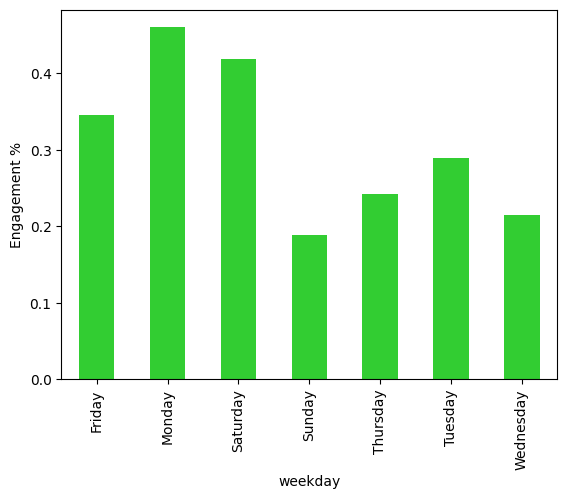

In [64]:
# Engagement Ratio by weekday
df_eng_ratio = df_new[df_new['Lifetime Post Paid Reach']==0]
df_eng_ratio.groupby('weekday')['engage_ratio'].mean()\
    .plot(kind='bar',color='limegreen')
plt.ylabel('Engagement %')

Text(0, 0.5, 'Engagement %')

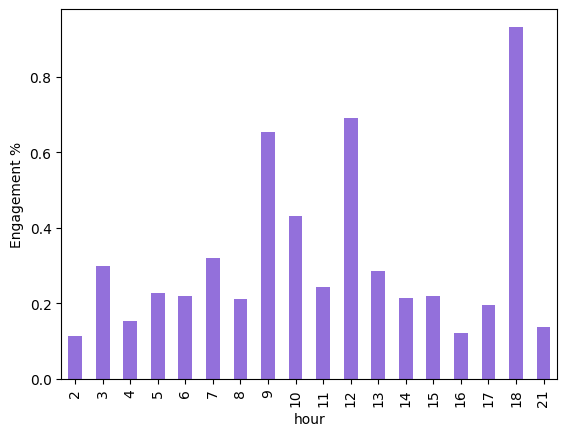

In [65]:
# Engagement Ratio by time
df_eng_ratio = df_new[df_new['Lifetime Post Paid Reach']==0]
df_eng_ratio.groupby('hour')['engage_ratio'].mean()\
    .plot(kind='bar',color='mediumpurple')
plt.ylabel('Engagement %')


In [66]:
# Adding likes and shares for a post
df_total_likes= df_total_likes.fillna(0)
df_total_likes['interactions'] = df_total_likes['like'] + df_total_likes['share']
df_total_likes.sort_values(by='interactions', ascending=False, inplace=True)
df_total_likes.head(5)

,Description,Post ID,Permalink,Post Message,Type,Countries,Languages,Posted,Audience Targeting,like,share,comment,interactions
147,0,386724564681370_4647181291968988,https://www.facebook.com/habitatmatthews/posts...,"Congratulations to our President & CEO, Natish...",Photo,0.0,0.0,2021-09-27 09:18:22,,234.0,102.0,4.0,336.0
151,0,386724564681370_451657956291460,https://www.facebook.com/habitatmatthews/video...,0,Video,0.0,0.0,2021-09-25 07:02:15,,51.0,21.0,3.0,72.0
50,0,386724564681370_4996888446998269,https://www.facebook.com/habitatmatthews/posts...,"Thank you to our most recent partner, BAPS Cha...",Photo,0.0,0.0,2022-01-10 12:49:22,,52.0,7.0,4.0,59.0
249,0,386724564681370_4334482183238902,https://www.facebook.com/habitatmatthews/posts...,We had a great time today at Waxhaw Escape for...,Photo,0.0,0.0,2021-06-14 10:05:20,,51.0,2.0,4.0,53.0
338,0,386724564681370_4083762151644241,https://www.facebook.com/habitatmatthews/posts...,"As part of Women's History Month, our friends ...",Photo,0.0,0.0,2021-03-23 06:50:28,,42.0,9.0,2.0,51.0


### Performing same analysis with posts having some content or caption

In [67]:
# Taking posts which have text in it
df_filtered_total_likes = df_total_likes[df_total_likes['Post Message'] != 0].copy()

In [68]:
# Performing clean operation on the posts messages
df_filtered_total_likes['clean_txt'] = df_filtered_total_likes['Post Message'].apply(clean)
df_filtered_total_likes['post_length'] = df_filtered_total_likes['clean_txt'].apply(lambda x: len(x.split()))

In [69]:
df_filtered_total_likes.head()

,Description,Post ID,Permalink,Post Message,Type,Countries,Languages,Posted,Audience Targeting,like,share,comment,interactions,clean_txt,post_length
147,0,386724564681370_4647181291968988,https://www.facebook.com/habitatmatthews/posts...,"Congratulations to our President & CEO, Natish...",Photo,0.0,0.0,2021-09-27 09:18:22,,234.0,102.0,4.0,336.0,"congratulation to our president & ceo, natisha...",48
50,0,386724564681370_4996888446998269,https://www.facebook.com/habitatmatthews/posts...,"Thank you to our most recent partner, BAPS Cha...",Photo,0.0,0.0,2022-01-10 12:49:22,,52.0,7.0,4.0,59.0,"thank you to our most recent partner, bap char...",47
249,0,386724564681370_4334482183238902,https://www.facebook.com/habitatmatthews/posts...,We had a great time today at Waxhaw Escape for...,Photo,0.0,0.0,2021-06-14 10:05:20,,51.0,2.0,4.0,53.0,we have a great time today at waxhaw escape fo...,47
338,0,386724564681370_4083762151644241,https://www.facebook.com/habitatmatthews/posts...,"As part of Women's History Month, our friends ...",Photo,0.0,0.0,2021-03-23 06:50:28,,42.0,9.0,2.0,51.0,"a part of women' history month, our friend at ...",75
40,0,386724564681370_5037750819578698,https://www.facebook.com/habitatmatthews/posts...,The trusses are up! Thanks to some crafty plan...,Photo,0.0,0.0,2022-01-20 07:39:20,,36.0,1.0,4.0,37.0,the truss be up! thank to some crafty plan by ...,33


In [70]:
df_filtered_total_likes.shape

(404, 15)

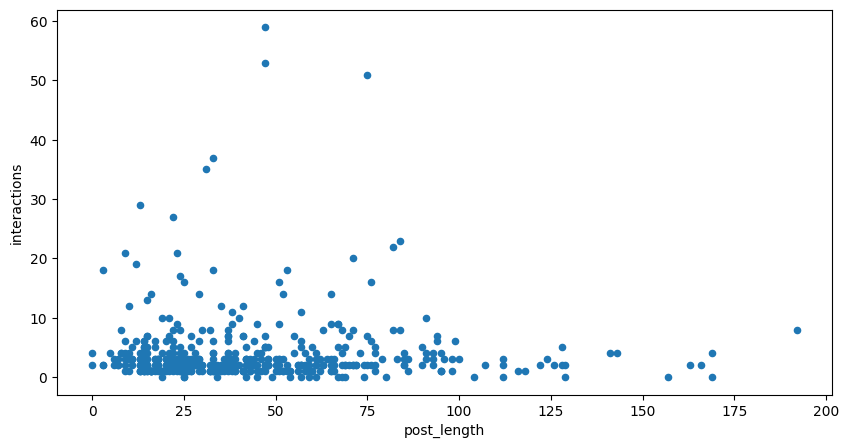

In [71]:
ax = df_filtered_total_likes[df_filtered_total_likes['Post ID']!='386724564681370_4647181291968988'].plot.scatter(x='post_length', y='interactions', figsize=(10,5))

In [78]:
df_filtered_total_likes.head()

,Description,Post ID,Permalink,Post Message,Type,Countries,Languages,Posted,Audience Targeting,like,share,comment,interactions,clean_txt,post_length,keyphrases
147,0,386724564681370_4647181291968988,https://www.facebook.com/habitatmatthews/posts/4647181291968988,"Congratulations to our President & CEO, Natisha Rivera-Patrick, for being selected as the Matthews Human Services Council’s Nancy Glenn Award recipient! We’re so proud of all the work she has done to make the Greater Matthews community a better, more equitable place for us all to call home!",Photo,0.0,0.0,2021-09-27 09:18:22,,234.0,102.0,4.0,336.0,"congratulation to our president & ceo, natisha rivera-patrick, for be select a the matthew human service council’ nancy glenn award recipient! we’re so proud of all the work she have do to make the greater matthew community a better, more equitable place for u all to call home!",48,"[[""council nancy"", 0.5207], [""nancy glenn"", 0.5089], [""ceo natisha"", 0.5011], [""glenn award"", 0.4935], [""matthew community"", 0.4689]]"
50,0,386724564681370_4996888446998269,https://www.facebook.com/habitatmatthews/posts/4996888446998269,"Thank you to our most recent partner, BAPS Charities, for helping us build community and supporting affordable housing in the Greater Matthews community! A special thank you to MB for advocating for our organization, and to Mayor John Higdon for joining as we celebrate our new connection!",Photo,0.0,0.0,2022-01-10 12:49:22,,52.0,7.0,4.0,59.0,"thank you to our most recent partner, bap charities, for help u build community and support affordable house in the greater matthew community! a special thank you to mb for advocate for our organization, and to mayor john higdon for join a we celebrate our new connection!",47,"[[""bap charities"", 0.5524], [""matthew community"", 0.5221], [""charities help"", 0.4638], [""greater matthew"", 0.4392], [""matthew"", 0.4296]]"
249,0,386724564681370_4334482183238902,https://www.facebook.com/habitatmatthews/posts/4334482183238902,"We had a great time today at Waxhaw Escape for our team-building challenge! Both groups escaped before the clock ran out, but team Alice in Wonderland inched out team Train to Nowhere by just a hare 🐰! They even made it on the leaderboard for the week!",Photo,0.0,0.0,2021-06-14 10:05:20,,51.0,2.0,4.0,53.0,"we have a great time today at waxhaw escape for our team-build challenge! both group escap before the clock run out, but team alice in wonderland inch out team train to nowhere by just a hare ! they even make it on the leaderboard for the week!",47,"[[""team alice"", 0.5587], [""escape team"", 0.5255], [""team build"", 0.5003], [""waxhaw escape"", 0.5002], [""team train"", 0.4936]]"
338,0,386724564681370_4083762151644241,https://www.facebook.com/habitatmatthews/posts/4083762151644241,"As part of Women's History Month, our friends at Mount Moriah Missionary Baptist Church honored our President & CEO, Natisha Rivera-Patrick, alongside three other strong and accomplished women, with a Pastor's Appreciation at their service this past Sunday. Natisha was selected for her leadership with Habitat, the Matthews Affordable Housing Alliance, and the Town of Matthews, NC's Cultural and Diversity Committee. ❤️ Thank you Pastor Whitley and your congregation for recognizing all of her hard work!",Photo,0.0,0.0,2021-03-23 06:50:28,,42.0,9.0,2.0,51.0,"a part of women' history month, our friend at mount moriah missionary baptist church honor our president & ceo, natisha rivera-patrick, alongside three other strong and accomplish women, with a pastor' appreciation at their service thi past sunday. natisha be select for her leadership with habitat, the matthew affordable house alliance, and the town of matthews, nc' cultural and diversity committee. thank you pastor whitley and your congregation for recognize all of her hard work!",75,"[[""natisha rivera"", 0.6105], [""ceo natisha"", 0.5939], [""natisha"", 0.5633], [""sunday natisha"", 0.5578], [""moriah missio

In [72]:
# Keyphrase extraction
kw_model = KeyBERT()
keyphrases2 = []
for idx,value in df_filtered_total_likes.head(20).iterrows(): 
    if value['Post Message'] != '' :        
        k = kw_model.extract_keywords(value['clean_txt'],keyphrase_ngram_range=(1,2),stop_words='english')
        keyphrases2 += list(map(lambda a : a[0], k))
        df_filtered_total_likes.loc[idx, 'keyphrases'] = json.dumps(k)


In [73]:
pd.set_option('display.max_colwidth',None)
df_filtered_total_likes[['interactions', 'keyphrases']].head(20)

,interactions,keyphrases
147,336.0,"[[""council nancy"", 0.5207], [""nancy glenn"", 0.5089], [""ceo natisha"", 0.5011], [""glenn award"", 0.4935], [""matthew community"", 0.4689]]"
50,59.0,"[[""bap charities"", 0.5524], [""matthew community"", 0.5221], [""charities help"", 0.4638], [""greater matthew"", 0.4392], [""matthew"", 0.4296]]"
249,53.0,"[[""team alice"", 0.5587], [""escape team"", 0.5255], [""team build"", 0.5003], [""waxhaw escape"", 0.5002], [""team train"", 0.4936]]"
338,51.0,"[[""natisha rivera"", 0.6105], [""ceo natisha"", 0.5939], [""natisha"", 0.5633], [""sunday natisha"", 0.5578], [""moriah missionary"", 0.5488]]"
40,37.0,"[[""install truss"", 0.7275], [""truss thank"", 0.6713], [""truss"", 0.6621], [""truss yesterday"", 0.6428], [""volunteer construction"", 0.39]]"
281,35.0,"[[""pastor chuck"", 0.6032], [""bless pastor"", 0.5545], [""home dedication"", 0.5085], [""methodist church"", 0.4665], [""unite methodist"", 0.4592]]"
129,29.0,"[[""birthday wish"", 0.5755], [""birthday"", 0.5403], [""happiest birthday"", 0.5394], [""manager kristen"", 0.5011], [""wish amaze"", 0.4573]]"
333,27.0,"[[""ceo natisha"", 0.5544], [""natisha rivera"", 0.5153], [""natisha"", 0.4514], [""cornell university"", 0.4326], [""proud president"", 0.4249]]"
104,23.0,"[[""santa elve"", 0.5784], [""hospital tree"", 0.5244], [""santa"", 0.468], [""tree novant"", 0.4537], [""elves member"", 0.4455]]"
73,22.0,"[[""volunteer holiday"", 0.5225], [""thank volunteer"", 0.5136], [""enjoy holiday"", 0.5054], [""merry time"", 0.4996], [""party appreciate"", 0.4978]]"


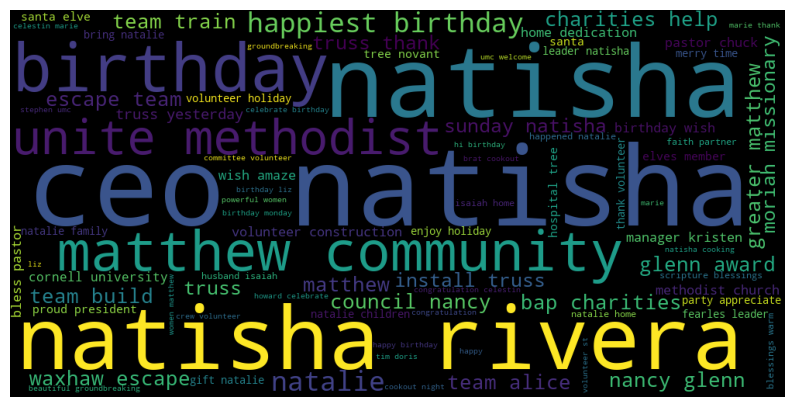

In [74]:
# Creating Word Cloud from all the key-phrases based on the frequency of their occurrence
word_could_dict=Counter(keyphrases2)
# Generating Word Cloud object
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
# Word Cloud Visual
plt.figure(figsize=(10,14))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Text(0, 0.5, 'Posts Count')

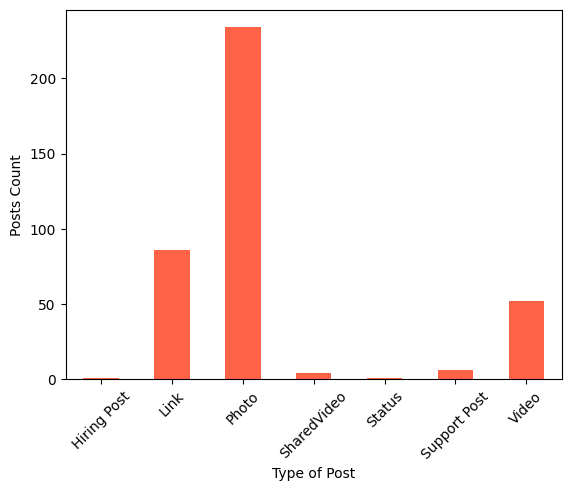

In [75]:
# Posts Count based on Type
df_new.groupby("Type")['Post Message'].count()\
    .plot(kind='bar',color='tomato')
plt.xticks(rotation = 45)
plt.xlabel('Type of Post')
plt.ylabel('Posts Count')

Text(0, 0.5, 'Posts Count')

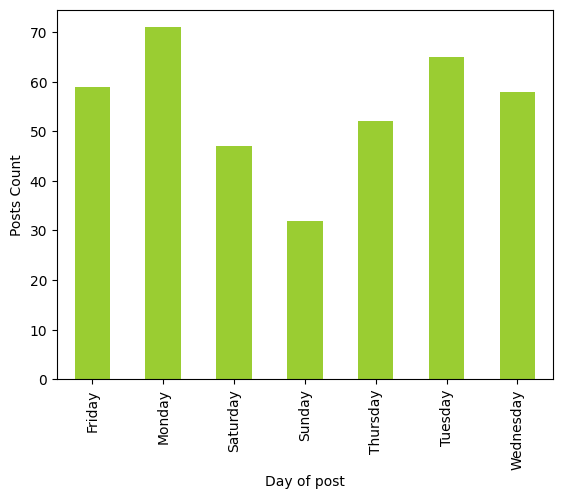

In [76]:
# Post Count on weekdays
df_new.groupby("weekday")['Post Message'].count()\
    .plot(kind='bar',color='yellowgreen')
plt.xlabel('Day of post')
plt.ylabel('Posts Count')

Text(0, 0.5, 'Post Count')

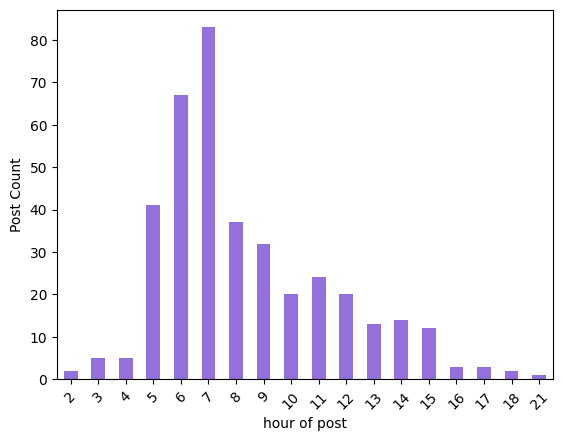

In [77]:
# Post Count by time(hour)
df_new.groupby("hour")['Post Message'].count()\
    .plot(kind='bar',color='mediumpurple')
plt.xticks(rotation=45)
# plt.xticks(np.arange(0,25,1),rotation = 45)
plt.xlabel('hour of post')
plt.ylabel('Post Count')